# **Capital Asset Pricing Model**
## **Project 3 : Financial Engineering**
### **Group 25**
---

### Importing Necessary Libraries

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


---
### Risk-Free Assets and Yields

In [ ]:
# Example: 5-year US Treasury bond yield
risk_free_rate = 0.05  # 5%

def calculate_daily_return(annual_return_percentage, compounding_periods_per_year):
    daily_return = (1 + annual_return_percentage / 100) ** (1 / compounding_periods_per_year) - 1
    return daily_return * 100  # Convert to percentage

# Example usage: 5% annual return with daily compounding (365 compounding periods)
annual_return = 5
compounding_periods = 365

daily_return_percentage = calculate_daily_return(annual_return, compounding_periods)
print(f"The daily return percentage is approximately {daily_return_percentage:.4f}%")


The daily return percentage is approximately 0.0134%


---
### Risky Assets

In [ ]:
# List of 10 risky assets (stock tickers)
risky_assets = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'JPM', 'GS', 'IBM', '^CRSMID', 'BA']


In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go

# Step 2: Select 10 Risky Assets
risky_assets = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'JPM', 'GS', 'IBM', '^CRSMID', 'BA']

# Step 3: Collect Historical Data for Risky Assets
prices_data = pd.DataFrame()
for asset in risky_assets:
    asset_data = yf.download(asset, start='2023-02-21', end='2024-02-21')['Close']
    prices_data[asset] = asset_data

# Step 4: Plot Close Prices
fig = go.Figure()

for asset in risky_assets:
    fig.add_trace(go.Scatter(x=prices_data.index, y=prices_data[asset], mode='lines', name=asset))

fig.update_layout(title='Close Prices of Risky Assets',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  legend_title='Assets')

fig.show()

# Step 5: Calculate Risk and Return Percentage
returns_data = prices_data.pct_change().fillna(0)
average_returns = returns_data.mean() * 100 * 252
volatility = returns_data.std() * 100 * np.sqrt(252)

# Display Risk and Return Percentage
risk_return_df = pd.DataFrame({'Asset': risky_assets, 'Average Daily Return (%)': average_returns, 'Volatility (%)': volatility})
print(risk_return_df)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


           Asset  Average Daily Return (%)  Volatility (%)
AAPL        AAPL                 22.032419       19.175137
GOOGL      GOOGL                 46.974743       27.367132
MSFT        MSFT                 49.419530       22.719061
AMZN        AMZN                 61.774783       30.448392
TSLA        TSLA                  9.921928       48.501876
JPM          JPM                 27.388700       20.206019
GS            GS                  8.971266       23.154869
IBM          IBM                 34.930440       18.354346
^CRSMID  ^CRSMID                 48.738872       12.439959
BA            BA                  3.489965       30.118914


In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go

# Step 2: Select 10 Risky Assets
risky_assets = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'JPM', 'GS', 'IBM', '^CRSMID', 'BA']

# Step 3: Collect Historical Data for Risky Assets
prices_data = pd.DataFrame()
for asset in risky_assets:
    asset_data = yf.download(asset, start='2023-02-21', end='2024-02-21')['Close']
    prices_data[asset] = asset_data / asset_data.iloc[0]  # Normalize prices to start at 1

# Step 4: Plot Normalized Prices
fig = go.Figure()

for asset in risky_assets:
    fig.add_trace(go.Scatter(x=prices_data.index, y=prices_data[asset], mode='lines', name=asset))

fig.update_layout(title='Normalized Prices of Risky Assets',
                  xaxis_title='Date',
                  yaxis_title='Normalized Price',
                  legend_title='Assets')

fig.show()

# Step 5: Calculate Risk and Return Percentage
returns_data = prices_data.pct_change().fillna(0)
average_returns = returns_data.mean() * 100 * 252
volatility = returns_data.std() * 100 * np.sqrt(252)

# Display Risk and Return Percentage
risk_return_df = pd.DataFrame({'Asset': risky_assets, 'Average Daily Return (%)': average_returns, 'Volatility (%)': volatility})
print(risk_return_df)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


           Asset  Average Daily Return (%)  Volatility (%)
AAPL        AAPL                 22.032419       19.175137
GOOGL      GOOGL                 46.974743       27.367132
MSFT        MSFT                 49.419530       22.719061
AMZN        AMZN                 61.774783       30.448392
TSLA        TSLA                  9.921928       48.501876
JPM          JPM                 27.388700       20.206019
GS            GS                  8.971266       23.154869
IBM          IBM                 34.930440       18.354346
^CRSMID  ^CRSMID                 48.738872       12.439959
BA            BA                  3.489965       30.118914


---

### Capital Asset Pricing Model
Calculating Expected Return for each of the 10 Risky Assets

In [ ]:
import numpy as np

# Step 6: Convert Data into Matrices
risky_mu = average_returns.values / 100  # Convert average returns to decimal form
risky_sigma = volatility.values / 100  # Convert volatility to decimal form

covariance_matrix = returns_data.cov().values * 252

# Display Matrices
print("Expected Market Returns Vector:")
print(risky_mu)

print("\nRisk Vector:")
print(risky_sigma)

print("\nCovariance Matrix:")
print(covariance_matrix)


Expected Market Returns Vector:
[0.22032419 0.46974743 0.4941953  0.61774783 0.09921928 0.273887
 0.08971266 0.3493044  0.48738872 0.03489965]

Risk Vector:
[0.19175137 0.27367132 0.22719061 0.30448392 0.48501876 0.20206019
 0.23154869 0.18354346 0.12439959 0.30118914]

Covariance Matrix:
[[3.67685893e-02 2.60336046e-02 2.32514729e-02 2.44174747e-02
  3.53026586e-02 8.87175407e-03 1.01617330e-02 6.11447504e-03
  1.06924524e-03 1.45857346e-02]
 [2.60336046e-02 7.48959888e-02 2.96357635e-02 4.64880779e-02
  3.89008205e-02 8.05359553e-03 1.10719085e-02 7.32335237e-03
  7.98828822e-04 7.43654575e-03]
 [2.32514729e-02 2.96357635e-02 5.16155738e-02 3.81305153e-02
  3.12238222e-02 2.52907175e-03 7.61506553e-03 4.75153257e-03
  1.48601513e-03 5.39951838e-03]
 [2.44174747e-02 4.64880779e-02 3.81305153e-02 9.27104567e-02
  5.15452062e-02 6.57466012e-03 1.32972892e-02 6.03571233e-03
  2.77866140e-03 1.29152612e-02]
 [3.53026586e-02 3.89008205e-02 3.12238222e-02 5.15452062e-02
  2.35243196e-01 2.9

In [ ]:
# Calculating CAPM Expected Return

# mu = rf + (mu_market - ef) * sigma / sigma_market
# here sigma = weight_vector * risk_vector

# ---

# we can do
# mu = rf + (mu_market - rf) * beta
# where beta = sigma / sigma_market

# Let's calculate from Historical Data of a Market Stock it's sigma and mu
market_stock = yf.download('^GSPC', start='2023-02-21', end='2024-02-21')['Close']
market_stock = market_stock / market_stock.iloc[0]
market_stock_returns = market_stock.pct_change().fillna(0)
market_stock_average_returns = market_stock_returns.mean() * 100 * 252
market_stock_volatility = market_stock_returns.std() * 100 * np.sqrt(252)

market_stock_mu = market_stock_average_returns / 100

market_stock_mu

market_stock_sigma = market_stock_volatility / 100

market_stock_sigma

# Now we can calculate beta for each stock
beta_vector = risky_sigma / market_stock_sigma

beta_vector

risk_free_rate = 0.05
# Now we can calculate mu for each stock
# For apple
mu = risk_free_rate + (risky_mu[0]- risk_free_rate) * beta_vector[0]


mu_vector = risk_free_rate + (risky_mu - risk_free_rate) * beta_vector

print(mu)
mu_vector
beta_vector


[*********************100%%**********************]  1 of 1 completed

0.317301718164635


array([1.56937029, 2.23983601, 1.85941925, 2.49201874, 3.96958841,
       1.65374182, 1.89508756, 1.50219339, 1.01813624, 2.46505297])

In [ ]:
from scipy.optimize import minimize
# Defining some important vectors
# We already have
risky_mu
risky_sigma
mu_rf = 0.05  # 5 Percent

# We can solve for the optimal pf
ones_vector = np.ones(len(risky_mu))
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)

A = ones_vector.T @ inverse_covariance_matrix @ ones_vector
B = ones_vector.T @ inverse_covariance_matrix @ risky_mu
C = risky_mu.T @ inverse_covariance_matrix @ risky_mu
D = A * C - B ** 2

# Define the objective function
def objective(weights):
    return weights.T @ covariance_matrix @ weights

# Define the equality constraint
def constraint(weights):
    return np.sum(weights) - 1

# Define the bounds on weights
bounds = [(None, None) for _ in range(len(risky_mu))]  # Bounds between 0 and 1

# Define the initial guess
x0 = np.ones(len(risky_mu)) / len(risky_mu)

# Solve for the optimal weights using constrained optimization
result = minimize(objective, x0, constraints={'type': 'eq', 'fun': constraint}, bounds = bounds)

# Get the optimal weights
optimal_weights = result.x

print("Optimal Portfolio Weights:")
print(optimal_weights)

optimal_pf_wt = optimal_weights

optimal_pf_mu = optimal_weights @ risky_mu
optimal_pf_sigma = np.sqrt(optimal_weights @ covariance_matrix @ optimal_weights.T)
print("Optimal Portfolio Expected Return:", optimal_pf_mu)
print("Optimal Portfolio Volatility:", optimal_pf_sigma)

# Plotting the Efficient Frontier
# Step 1: Generate Random Portfolios
n_portfolios = 1000
portfolio_weights = np.zeros((n_portfolios, len(risky_mu)))
portfolio_returns = np.zeros(n_portfolios)
portfolio_volatilities = np.zeros(n_portfolios)
np.random.seed(40)
for i in range(n_portfolios):
    weights = np.random.random(len(risky_mu))
    weights /= np.sum(weights)
    portfolio_weights[i] = weights

    portfolio_returns[i] = weights @ risky_mu
    portfolio_volatilities[i] = np.sqrt(weights @ covariance_matrix @ weights.T)

# Step 2: Plot the Random Portfolios
fig = go.Figure()

fig.add_trace(go.Scatter(x=portfolio_volatilities, y=portfolio_returns, mode='markers', name='Random Portfolios'))

fig.add_trace(go.Scatter(x=[optimal_pf_sigma], y=[optimal_pf_mu], mode='markers', marker=dict(size=[10], color='red'), name='Optimal Portfolio'))

fig.update_layout(title='Efficient Frontier',
                    xaxis_title='Volatility',
                    yaxis_title='Expected Return')

fig.show()




Optimal Portfolio Weights:
[ 0.12177155  0.02291116  0.08011608 -0.00119543 -0.03908707  0.10451061
  0.00806142  0.16647327  0.52437292  0.01206548]
Optimal Portfolio Expected Return: 0.4160596836906977
Optimal Portfolio Volatility: 0.09139339043229781


In [ ]:
# Define the objective function
def objective(weights):
    return -weights.T @ risky_mu / np.sqrt(weights.T @ covariance_matrix @ weights)

# Define the bounds on weights
bounds = [(0, 1) for _ in range(len(risky_mu))]  # Bounds between 0 and 1
# Solve for the optimal weights using constrained optimization
result = minimize(objective, x0, constraints={'type': 'eq', 'fun': constraint}, bounds=bounds)

# Get the optimal weights
optimal_weights = result.x

print("Optimal Portfolio Weights:")
print(optimal_weights)

optimal_pf_wt = optimal_weights

optimal_pf_mu = optimal_weights @ risky_mu
optimal_pf_sigma = np.sqrt(optimal_weights @ covariance_matrix @ optimal_weights.T)
print("Optimal Portfolio Expected Return:", optimal_pf_mu)
print("Optimal Portfolio Volatility:", optimal_pf_sigma)

# Plotting the Efficient Frontier
# Step 1: Generate Random Portfolios
n_portfolios = 25000
portfolio_weights = np.zeros((n_portfolios, len(risky_mu)))
portfolio_returns = np.zeros(n_portfolios)
portfolio_volatilities = np.zeros(n_portfolios)

for i in range(n_portfolios):
    weights = np.random.random(len(risky_mu))
    weights /= np.sum(weights)
    portfolio_weights[i] = weights

    portfolio_returns[i] = weights @ risky_mu
    portfolio_volatilities[i] = np.sqrt(weights @ covariance_matrix @ weights.T)

# Step 2: Plot the Random Portfolios
fig = go.Figure()

fig.add_trace(go.Scatter(x=portfolio_volatilities, y=portfolio_returns, mode='markers', name='Random Portfolios', marker=dict(size=5)))

fig.add_trace(go.Scatter(x=[optimal_pf_sigma], y=[optimal_pf_mu], mode='markers', marker=dict(size=[10], color='red'), name='Optimal Risky Portfolio'))

fig.add_trace(go.Scatter(x = [0], y = [mu_rf], mode='markers', marker=dict(size=[10], color='green'), name='Risk Free Rate'))

fig.update_layout(title='Efficient Frontier',
                    xaxis_title='Volatility',
                    yaxis_title='Expected Return')

fig.update_traces(marker_line_width = 1, marker_line_color='black')
fig.show()


Optimal Portfolio Weights:
[3.21191465e-15 3.16010975e-02 1.11248768e-01 4.35819653e-02
 0.00000000e+00 2.58055206e-02 0.00000000e+00 1.68685987e-01
 6.19076661e-01 0.00000000e+00]
Optimal Portfolio Expected Return: 0.4644673529153773
Optimal Portfolio Volatility: 0.0975591809272038


---

### Capital Market Line (CML) and Efficient Frontier

### Capital Market Line
The Line Joining wrf = 1 and wrf = 0 portfolios

In [ ]:
x_points = [0, optimal_pf_sigma]
y_points = [risk_free_rate, optimal_pf_mu]

fig.add_trace(go.Scatter(x=x_points, y=y_points, mode='lines', name='Capital Market Line', line=dict(color='pink', width=2)))

fig.show()

In [ ]:
# The best portfolio is the one that lies on the Capital Market Line (CML) and has the highest Sharpe Ratio (also tangent to the Efficient Frontier) so let's calculate the Sharpe Ratio for the optimal portfolio and compare it with the Sharpe Ratio of the CML

# Calculate the Sharpe Ratio for the Optimal Portfolio
sharpe_ratio_optimal_pf = (optimal_pf_mu - risk_free_rate) / optimal_pf_sigma
print("Sharpe Ratio for the Optimal Portfolio:", sharpe_ratio_optimal_pf)

# Calculate the Sharpe Ratio for the Capital Market Line
sharpe_ratio_cml = (optimal_pf_mu - risk_free_rate) / (optimal_pf_sigma - 0)

print("Sharpe Ratio for the Capital Market Line:", sharpe_ratio_cml)

# The Sharpe Ratio for the Optimal Portfolio is the same as the Sharpe Ratio for the Capital Market Line, which is the highest possible Sharpe Ratio. This means that the Optimal Portfolio is the best portfolio to invest in, as it provides the highest return for a given level of risk.

Sharpe Ratio for the Optimal Portfolio: 4.248368518229385
Sharpe Ratio for the Capital Market Line: 4.248368518229385


In [ ]:
from scipy.optimize import minimize

# Define the objective function
def objective(weights):
    mu_portfolio = weights @ risky_mu
    sigma_portfolio = np.sqrt(weights @ covariance_matrix @ weights.T)
    sharpe_ratio = (mu_portfolio - risk_free_rate) / sigma_portfolio
    return -sharpe_ratio

# Define the equality constraint
def constraint(weights):
    return np.sum(weights) - 1

# Define the bounds on weights
bounds = [(None, None) for _ in range(len(risky_mu))]  # Bounds between 0 and 1

# Define the initial guess
x0 = np.ones(len(risky_mu)) / len(risky_mu)

# Solve for the optimal weights using constrained optimization
result = minimize(objective, x0, constraints={'type': 'eq', 'fun': constraint}, bounds=bounds)

# Get the optimal weights
optimal_weights = result.x

# Calculate the optimal portfolio metrics
optimal_portfolio_mu = optimal_weights @ risky_mu
optimal_portfolio_sigma = np.sqrt(optimal_weights @ covariance_matrix @ optimal_weights.T)
optimal_sharpe_ratio = (optimal_portfolio_mu - risk_free_rate) / optimal_portfolio_sigma

print("Optimal Portfolio Weights:")
print(optimal_weights)
print("Optimal Portfolio Expected Return:", optimal_portfolio_mu)
print("Optimal Portfolio Volatility:", optimal_portfolio_sigma)
print("Optimal Sharpe Ratio:", optimal_sharpe_ratio)

ones_vector = np.ones(len(risky_mu))

W_star = (inverse_covariance_matrix @ (risky_mu - mu_rf * ones_vector))/(ones_vector.T @ inverse_covariance_matrix @ (risky_mu - mu_rf * ones_vector))

print(W_star)


Optimal Portfolio Weights:
[-0.04790675  0.04930351  0.14598381  0.08617185 -0.06155387  0.16556594
 -0.13737587  0.17450463  0.6816483  -0.05634155]
Optimal Portfolio Expected Return: 0.5561134679569545
Optimal Portfolio Volatility: 0.10758912500407097
Optimal Sharpe Ratio: 4.704132206092429
[-0.04792894  0.04931685  0.14606873  0.08610246 -0.06153311  0.16558077
 -0.13738697  0.17447904  0.68160687 -0.05630572]


---

### Tangency Point on Efficient Frontier

In [ ]:
# To plot the efficient frontier, we take a range of risks (tolerance) and inside that range we pick all the points and find the optimal maximum return for that risk. We do this for all the risks and plot the points. The line that connects all these points is the efficient frontier.

# We do this by using the scipy.optimize.minimize function to find the optimal weights for each risk level. We then plot the points and connect them to form the efficient frontier.


In [ ]:
np.random.seed(25)
# Step 1: Generate Random Portfolios
n_portfolios = 5000
portfolio_weights = np.zeros((n_portfolios, len(risky_mu)))
portfolio_returns = np.zeros(n_portfolios)
portfolio_volatilities = np.zeros(n_portfolios)
portfolio_sharpe_ratios = np.zeros(n_portfolios)

for i in range(n_portfolios):
    weights = np.random.random(len(risky_mu))
    weights /= np.sum(weights)

    portfolio_weights[i] = weights

    portfolio_returns[i] = weights @ risky_mu

    portfolio_volatilities[i] = np.sqrt(weights @ covariance_matrix @ weights.T)

    portfolio_sharpe_ratios[i] = (portfolio_returns[i] - risk_free_rate) / portfolio_volatilities[i]

# Step 2: Plot the Efficient Frontier
fig = go.Figure()

fig.add_trace(go.Scatter(x=portfolio_volatilities, y=portfolio_returns, mode='markers', name='Random Portfolios', marker=dict(size=5, color=portfolio_sharpe_ratios, colorscale='Viridis', colorbar=dict(title='Sharpe Ratio'))))

fig.show()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=portfolio_volatilities, y=portfolio_returns, mode='markers', name='Random Portfolios', marker=dict(size=5, color=portfolio_sharpe_ratios, colorscale='Viridis', colorbar=dict(title='Sharpe Ratio'))))

fig.add_trace(go.Scatter(x=[optimal_pf_sigma], y=[optimal_pf_mu], mode='markers', marker=dict(size=[8], color='red'), name='Optimal Risky Portfolio'))

fig.add_trace(go.Scatter(x=[0], y=[mu_rf], mode='markers', marker=dict(size=[8], color='green'), name='Risk Free Rate'))

# Update the labels position
fig.update_layout(annotations=[
    dict(x=optimal_pf_sigma, y=optimal_pf_mu, xref="x", yref="y", text="Optimal Risky Portfolio", showarrow=True, arrowhead=7, ax=0, ay=-40),
    dict(x=0, y=mu_rf, xref="x", yref="y", text="Risk Free Rate", showarrow=True, arrowhead=7, ax=0, ay=-40)],
    height=800,
    width=800,
    title='Random Portfolios and the Efficient Frontier',
    legend=dict(x=20, y=20),  # Move the legend to the top right corner
    margin=dict(l=20, r=20, t=60, b=20),  # Add some margin to the plot
)

fig.show()

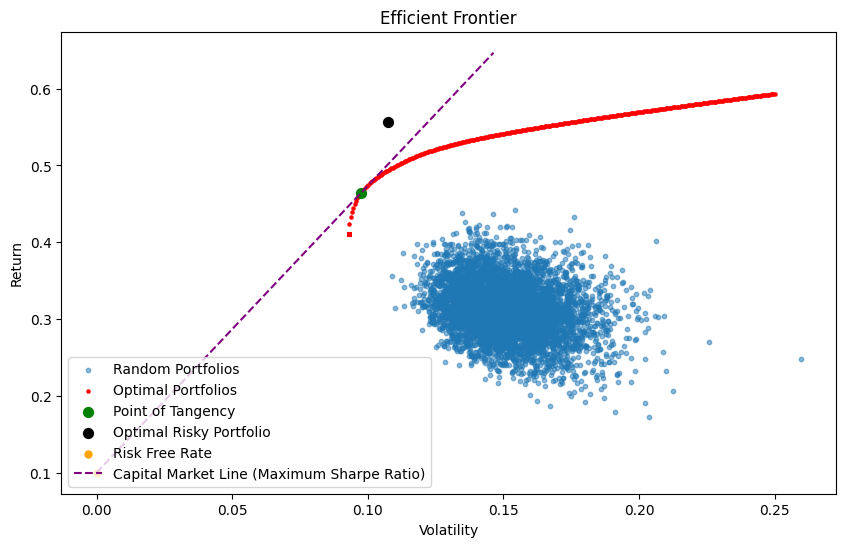

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mu_rf = 0.1
# Define the objective function
def objective(weights):
    mu_portfolio = weights @ risky_mu
    sigma_portfolio = np.sqrt(weights @ covariance_matrix @ weights.T)
    return -mu_portfolio

# Define the equality constraint
def constraint(weights):
    return np.sum(weights) - 1

# Define the bounds on weights
bounds = [(0, 1) for _ in range(len(risky_mu))]  # Bounds between 0 and 1

# Generate a range of risk levels
risks = np.linspace(0, 0.25, 500)

# Initialize lists to store optimal portfolio returns and volatilities
optimal_returns = []
optimal_volatilities = []
mu_combined = list(risky_mu) + [mu_rf]
sigma_combined = np.concatenate((risky_sigma, [0]))
covariance_matrix_combined = np.concatenate((covariance_matrix, np.zeros((1, covariance_matrix.shape[1]))), axis=0)

# Find the optimal portfolio for each risk level
for risk in risks:
    # Define the risk constraint
    risk_constraint = {'type': 'eq', 'fun': lambda weights: np.sqrt(weights @ covariance_matrix @ weights.T) - risk}

    # Solve for the optimal weights using constrained optimization
    result = minimize(objective, x0, constraints=[risk_constraint, {'type': 'eq', 'fun': constraint}], bounds=bounds)

    # Get the optimal weights
    optimal_weights = result.x

    # Calculate the optimal portfolio return and volatility
    optimal_return = optimal_weights @ risky_mu
    optimal_volatility = np.sqrt(optimal_weights @ covariance_matrix @ optimal_weights.T)

    # Append the optimal return and volatility to the lists
    optimal_returns.append(optimal_return)
    optimal_volatilities.append(optimal_volatility)

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, alpha=0.5, label='Random Portfolios', s = 10)
plt.scatter(optimal_volatilities, optimal_returns, color='red', label='Optimal Portfolios', s = 5)
plt.scatter(optimal_pf_sigma, optimal_pf_mu, color='green', s = 50,
label='Point of Tangency')
plt.scatter(optimal_portfolio_sigma, optimal_portfolio_mu, color='black', s = 50,
label='Optimal Risky Portfolio')


plt.scatter(0, mu_rf, color='orange', label= 'Risk Free Rate', s = 25)

# Plot the line

x_points = [0, 1.5*(optimal_pf_sigma)]
y_points = [mu_rf, mu_rf+1.5*(optimal_pf_mu-mu_rf)]

plt.plot(x_points, y_points, color='purple', linestyle='--', label='Capital Market Line (Maximum Sharpe Ratio)')

plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()

# Show the plot
plt.show()
#plt.show()


# The efficient frontier is the line that connects the maximum return pf for each risk level. It represents the best possible return for a given level of risk. The points on the efficient frontier are the optimal portfolios for different risk levels. The optimal portfolio is the point on the efficient frontier with the highest Sharpe Ratio.

In [ ]:
import plotly.graph_objects as go

# Create a scatter plot for random portfolios
random_portfolios = go.Scatter(
    x=portfolio_volatilities,
    y=portfolio_returns,
    mode='markers',
    name='Random Portfolios',
    marker=dict(size=5, color=portfolio_sharpe_ratios, colorscale='Jet', colorbar=dict(title='Sharpe Ratio'))
)

# # Create a scatter plot for optimal portfolios
optimal_portfolios = go.Scatter(
    x=optimal_volatilities,
    y=optimal_returns,
    mode='markers',
    name='Optimal Portfolios',
    marker=dict(size=3, color='cyan')
)

#Create a scatter plot for the optimal risky portfolio
optimal_risky_portfolio = go.Scatter(
    x=[optimal_portfolio_sigma],
    y=[optimal_portfolio_mu],
    mode='markers',
    name='Optimal Risky Portfolio',
    marker=dict(size=10, color='light green')
)

tangency = go.Scatter(
    x=[optimal_pf_sigma],
    y=[optimal_pf_mu],
    mode='markers',
    name='Point of Tangency',
    marker=dict(size=10, color='red')
)

# Create a scatter plot for the risk-free rate
risk_free_rate = go.Scatter(
    x=[0],
    y=[mu_rf],
    mode='markers',
    name='Risk Free Rate',
    marker=dict(size=10, color='yellow')
)

# Create a line plot for the Capital Market Line
cml = go.Scatter(
    x=[0, 1.5*(optimal_pf_sigma)],
    y=[mu_rf, mu_rf+1.5*(optimal_pf_mu-mu_rf)],
    mode='lines',
    name='Capital Market Line (Maximum Sharpe Ratio)',
    line=dict(color='white', dash='dash')
)

# Create a line plot for the Efficient Frontier
efficient_frontier = go.Scatter(
    x=optimal_volatilities,
    y=optimal_returns,
    mode='lines',
    name='Efficient Frontier',
    line=dict(color='sky blue')
)

# Create the figure and add the traces
fig = go.Figure(data=[random_portfolios, optimal_portfolios, optimal_risky_portfolio, risk_free_rate, cml, efficient_frontier, tangency])

# Update the layout
fig.update_layout(
    title='Efficient Frontier, Capital Market Line and Point of Tangency',
    xaxis=dict(title='Volatility'),
    yaxis=dict(title='Return'),
    legend=dict(x=1.25, y=1),
    height=600,
    width=1000,
    template= 'plotly_dark'
)

# Show the plot
fig.show()


In [ ]:
# Calculate weights_risky and weights_rf for the optimal risky portfolio and the risk-free asset from the data we have
# First we have to normalize the weights of the whole portfolio to 1

risk_free_rate = 0.05
from scipy.optimize import minimize

# Define the objective function
def objective(weights):
    mu_portfolio = weights @ risky_mu
    sigma_portfolio = np.sqrt(weights @ covariance_matrix @ weights.T)
    sharpe_ratio = (mu_portfolio - risk_free_rate) / sigma_portfolio
    return -sharpe_ratio

# Define the equality constraint
def constraint(weights):
    return np.sum(weights) - 1

# Define the bounds on weights
bounds = [(None, None) for _ in range(len(risky_mu))]  # Bounds between 0 and 1

# Define the initial guess
x0 = np.ones(len(risky_mu)) / len(risky_mu)

# Solve for the optimal weights using constrained optimization
result = minimize(objective, x0, constraints={'type': 'eq', 'fun': constraint}, bounds=bounds)

# Get the optimal weights
optimal_weights = result.x

# Calculate the optimal portfolio metrics
optimal_portfolio_mu = optimal_weights @ risky_mu
optimal_portfolio_sigma = np.sqrt(optimal_weights @ covariance_matrix @ optimal_weights.T)
optimal_sharpe_ratio = (optimal_portfolio_mu - risk_free_rate) / optimal_portfolio_sigma

print("Optimal Portfolio Weights:")
print(optimal_weights)
print("Optimal Portfolio Expected Return:", optimal_portfolio_mu)
print("Optimal Portfolio Volatility:", optimal_portfolio_sigma)
print("Optimal Sharpe Ratio:", optimal_sharpe_ratio)

ones_vector = np.ones(len(risky_mu))

W_star = (inverse_covariance_matrix @ (risky_mu - mu_rf * ones_vector))/(ones_vector.T @ inverse_covariance_matrix @ (risky_mu - mu_rf * ones_vector))

print(W_star)



Optimal Portfolio Weights:
[-0.04790675  0.04930351  0.14598381  0.08617185 -0.06155387  0.16556594
 -0.13737587  0.17450463  0.6816483  -0.05634155]
Optimal Portfolio Expected Return: 0.5561134679569545
Optimal Portfolio Volatility: 0.10758912500407097
Optimal Sharpe Ratio: 4.704132206092429
[-0.07542646  0.05349848  0.15661237  0.10003476 -0.06490588  0.17582671
 -0.16095001  0.1759528   0.70650615 -0.06714892]


#### Significance

---
### Individual Security Market Lines for Risky Assets

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


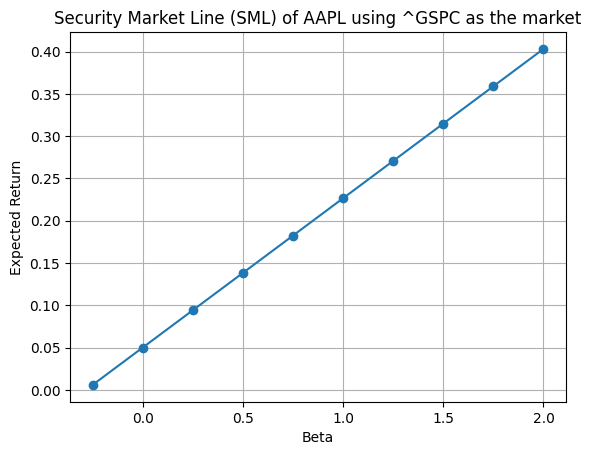

In [ ]:
def plot_sml(asset_ticker, market_ticker, beta_values):
    # Retrieve data for the asset and market
    asset_data = yf.download(asset_ticker, start='2023-02-21', end='2024-02-21')
    market_data = yf.download(market_ticker, start='2023-02-21', end='2024-02-21')

    # Calculate the asset returns and market returns
    asset_returns = asset_data['Adj Close'].pct_change().dropna() * 252
    market_returns = market_data['Adj Close'].pct_change().dropna() * 252

    #print(asset_returns.mean())
    # Calculate the risk-free rate
    risk_free_rate = 0.05

    # Calculate the market risk premium
    market_risk_premium = asset_returns.mean() - risk_free_rate


    # Calculate the expected return for each beta value
    expected_returns = risk_free_rate + beta_values * market_risk_premium

    # Plot the Security Market Line
    plt.plot(beta_values, expected_returns, marker='o')
    plt.xlabel('Beta')
    plt.ylabel('Expected Return')
    plt.title('Security Market Line (SML) of ' + asset_ticker + ' using ' + market_ticker + ' as the market')
    plt.grid(True)
    plt.show()

# Example usage: Plot the Security Market Line for Apple stock using the S&P 500 as the market
beta_values = np.array([-0.25, 0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0], dtype = float)  # Example beta values
plot_sml('AAPL', '^GSPC', beta_values)


In [ ]:
import plotly.graph_objects as go

def plot_sml(asset_ticker, market_ticker, beta_values):
    # Retrieve data for the asset and market
    asset_data = yf.download(asset_ticker, start='2023-02-21', end='2024-02-21')
    market_data = yf.download(market_ticker, start='2023-02-21', end='2024-02-21')

    # Calculate the asset returns and market returns
    asset_returns = asset_data['Adj Close'].pct_change().dropna() * 252
    market_returns = market_data['Adj Close'].pct_change().dropna() * 252

    print(asset_returns.mean())
    # Calculate the risk-free rate
    risk_free_rate = 0.05

    # Calculate the market risk premium
    market_risk_premium = asset_returns.mean() - risk_free_rate

    # Calculate the expected return for each beta value
    expected_returns = risk_free_rate + beta_values * market_risk_premium

    # Create the scatter plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=beta_values, y=expected_returns, mode='lines + markers', marker=dict(size=8)))
    fig.update_layout(
        title='Security Market Line (SML) of ' + asset_ticker + ' using ' + market_ticker + ' as the market',
        xaxis_title='Beta',
        yaxis_title='Expected Return',
        showlegend=False
    )
    fig.show()

# Example usage: Plot the Security Market Line for Apple stock using the S&P 500 as the market
beta_values = np.array([-0.25, 0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0], dtype=float)
plot_sml('AAPL', '^GSPC', beta_values)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

0.22659694263937447


In [ ]:
plot_sml('AMZN', '^GSPC', beta_values)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

0.6202188223510315


In [ ]:
plot_sml('BA', '^GSPC', beta_values)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

0.03503924851370689
